<a href="https://colab.research.google.com/github/titicacatiticaca/thi_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
# Write your code here
# Import required packages
import numpy as np
import pandas as pd
import csv

!pip install stop_words
# Define function for tokenize and lemmatizing
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
!pip install pyLDAvis==2.1.2
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt





  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=e99ff4f600af87dbd2dc4837a5bfa955d3b2b60d96acc99eaec5bdfe6181a510
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words
     |████████████████████████████████| 1.6 MB 13.8 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=6e612dd7587f0be12d052bf7421f8fbc391687c471a18340a9af17cf55d19489
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/avt_review.csv')
df.head()


,Unnamed: 0,username,star,review title,review text,review date
0,0,Leofwine_draca,8/10,"Good, if derivative",A pretty good movie; not quite the masterpiece...,28 October 2020
1,1,SnoopyStyle,8/10,great character work,Gotham is in dire difficulties like New York C...,26 November 2019
2,2,Hitchcoc,10/10,It's About a Man,While I've watched many of the superhero movie...,7 March 2020
3,3,Kirpianuscus,NaN,a mirror,"In many aspects, it is a mirror. For society, ...",15 December 2019
4,4,boblipton,7/10,Attention Must Be Paid,"In a crumbling Gotham City, where the governme...",4 October 2021


In [ ]:
df['review text'] = df['review text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['review text'] = df['review text'].str.replace('[^\w\s]','')
df['review text'] = df['review text'].str.lower()
df

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-5-fcbe68f498f5>:2: DeprecationWarning: invalid escape sequence \w
  df['review text'] = df['review text'].str.replace('[^\w\s]','')


,Unnamed: 0,username,star,review title,review text,review date
0,0,Leofwine_draca,8/10,"Good, if derivative",a pretty good movie not quite the masterpiece ...,28 October 2020
1,1,SnoopyStyle,8/10,great character work,gotham is in dire difficulties like new york c...,26 November 2019
2,2,Hitchcoc,10/10,It's About a Man,while ive watched many of the superhero movies...,7 March 2020
3,3,Kirpianuscus,NaN,a mirror,in many aspects it is a mirror for society for...,15 December 2019
4,4,boblipton,7/10,Attention Must Be Paid,in a crumbling gotham city where the governmen...,4 October 2021
...,...,...,...,...,...,...
120,120,TOMNEL,7/10,"Wonderful looking movie, that doesn't live up ...",james cameron is known for taking us to new wo...,2 January 2010
121,121,aharmas,10/10,When Lighting Strikes,james cameron does learn from his previous eff...,30 December 2009
122,122,Enchorde,8/10,"Stunning and imaginative visually, but a stere...",recap mankind has gone for the stars and found...,23 September 2010
123,123,Jonny_Numb,8/10,Cameron's Visual Dazzle Saves Familiar Story,at this point the smothering hype machine has ...,13 January 2010


In [ ]:
# tokenize words and Clean-up text
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
stop_plus = ['avatar']

# create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# create list of documents
review_set = [review for review in df['review text']]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in review_set:
    
    # clean and tokenize document string
    tokens = tokenizer.tokenize(i)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop + stop_plus]
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# building LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=50)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# view the top 10 topics in LDA model by using print_topics
for topic in ldamodel.print_topics(num_topics=10, num_words=8):
    print(topic)

(0, '0.011*"movie" + 0.010*"film" + 0.007*"one" + 0.006*"story" + 0.005*"will" + 0.005*"jake" + 0.004*"pandora" + 0.004*"planet"')
(1, '0.018*"film" + 0.008*"one" + 0.008*"movie" + 0.007*"really" + 0.006*"just" + 0.006*"cameron" + 0.006*"time" + 0.005*"can"')
(2, '0.008*"story" + 0.008*"cameron" + 0.006*"like" + 0.005*"film" + 0.005*"pandora" + 0.005*"new" + 0.005*"things" + 0.004*"movie"')
(3, '0.009*"film" + 0.006*"arthur" + 0.005*"navi" + 0.005*"best" + 0.005*"one" + 0.004*"camerons" + 0.004*"world" + 0.004*"cameron"')
(4, '0.004*"effects" + 0.004*"great" + 0.004*"however" + 0.003*"story" + 0.003*"cameron" + 0.003*"pandora" + 0.003*"fantastic" + 0.003*"mining"')
(5, '0.015*"movie" + 0.008*"like" + 0.006*"people" + 0.004*"movies" + 0.004*"something" + 0.004*"film" + 0.004*"joker" + 0.004*"even"')
(6, '0.015*"movie" + 0.009*"navi" + 0.008*"film" + 0.006*"like" + 0.006*"one" + 0.006*"story" + 0.005*"jake" + 0.005*"cameron"')
(7, '0.016*"film" + 0.009*"movie" + 0.008*"cameron" + 0.007*"

In [ ]:
# compute Conherence score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30086055061425365


In [ ]:
# Visualize the topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.084566 -0.020483       1        1  22.093858
1      0.081170 -0.009837       2        1  18.381251
7      0.089603 -0.009503       3        1  14.905494
3     -0.010228  0.133421       4        1  13.799649
9      0.027292  0.015437       5        1   8.317562
0      0.027904 -0.011778       6        1   7.428121
2     -0.025857 -0.057298       7        1   6.084778
8     -0.081911 -0.083590       8        1   4.348988
5     -0.086672  0.049215       9        1   4.069635
4     -0.105866 -0.005585      10        1   0.570664, topic_info=          Term        Freq       Total Category  logprob  loglift
28       movie  233.000000  233.000000  Default   30.000  30.0000
220    effects   75.000000   75.000000  Default   29.000  29.0000
14        film  305.000000  305.000000  Default   28.000  28.0000
110      great   68.000000   68.000000  Default   27.000  27.0000
1996   cameron  143.000000  143.000000  Default   26.000  26.0000
...        ...         ...         ...      ...      ...      ...
2124    weaver    0.206208   35.244584  Topic10   -6.592   0.0249
833         im    0.206208   27.379909  Topic10   -6.592   0.2774
206     acting    0.206208   15.254417  Topic10   -6.592   0.8624
130       many    0.206208   44.057255  Topic10   -6.592  -0.1982
89    director    0.206208   30.513965  Topic10   -6.592   0.1691

[816 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
4040      4  0.353541  2001
4040      8  0.353541  2001
4016      9  0.749283  2004
4221      6  0.906085  2008
4017      9  0.749283    22
...     ...       ...   ...
866       6  0.161973   yet
866       7  0.040493   yet
866       8  0.080987   yet
866       9  0.040493   yet
2355      3  0.915757   zoë

[1902 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 8, 4, 10, 1, 3, 9, 6, 5])

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2021-10-23 00:59:37--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  10.2MB/s    in 1.5s    

2021-10-23 00:59:39 (10.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=dictionary)
print(ldamallet.show_topics(formatted=False))

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


[(12, [('action', 0.0423728813559322), ('lot', 0.03389830508474576), ('makes', 0.03072033898305085), ('pretty', 0.029661016949152543), ('hype', 0.0211864406779661), ('watching', 0.0211864406779661), ('interesting', 0.01694915254237288), ('idea', 0.01694915254237288), ('doesnt', 0.015889830508474576), ('form', 0.015889830508474576)]), (19, [('worthington', 0.036298932384341634), ('weaver', 0.0298932384341637), ('sam', 0.027758007117437724), ('neytiri', 0.026334519572953737), ('sigourney', 0.025622775800711744), ('zoe', 0.024199288256227757), ('saldana', 0.024199288256227757), ('marine', 0.024199288256227757), ('stephen', 0.02206405693950178), ('pandora', 0.021352313167259787)]), (14, [('real', 0.03412616339193381), ('make', 0.025853154084798345), ('made', 0.022750775594622543), ('time', 0.02171664943123061), ('dont', 0.01964839710444674), ('feel', 0.01964839710444674), ('message', 0.017580144777662874), ('felt', 0.017580144777662874), ('line', 0.01344364012409514), ('end', 0.01344364012

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
start = 1
stop = 40
step = 1
coherence_values = []
model_list = []
for num_topics in range(start, stop, step):
    model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

print(coherence_values)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

[0.32044492616579867, 0.3352922149718763, 0.4337374302379627, 0.51002643251354, 0.481917559083718, 0.440587394244981, 0.456867369219485, 0.43449370994200465, 0.41426913729237824, 0.40421799816292203, 0.39389417695763035, 0.4119122989924305, 0.4172288846020817, 0.3767288957068252, 0.4196912762356842, 0.3701917571779457, 0.40026825134355754, 0.37623054736499867, 0.3721082927121799, 0.369986193432268, 0.3706115346584065, 0.373647993791535, 0.35922648178163724, 0.3566508922655789, 0.3868948827885527, 0.36806471134102037, 0.3672144667049894, 0.38790881390629733, 0.3596514509168546, 0.37088509872446124, 0.35287323406807714, 0.3662329728843346, 0.3745913914277558, 0.3756496636194821, 0.3655715276312785, 0.3625791361288976, 0.3605015689054434, 0.35876187580905994, 0.36156357429559033]


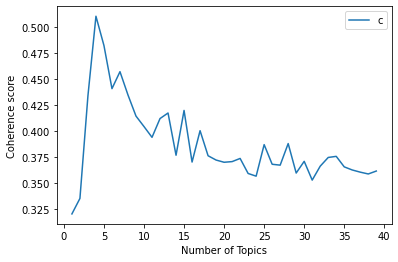

In [ ]:
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3204
Num Topics = 2  has Coherence Value of 0.3353
Num Topics = 3  has Coherence Value of 0.4337
Num Topics = 4  has Coherence Value of 0.51
Num Topics = 5  has Coherence Value of 0.4819
Num Topics = 6  has Coherence Value of 0.4406
Num Topics = 7  has Coherence Value of 0.4569
Num Topics = 8  has Coherence Value of 0.4345
Num Topics = 9  has Coherence Value of 0.4143
Num Topics = 10  has Coherence Value of 0.4042
Num Topics = 11  has Coherence Value of 0.3939
Num Topics = 12  has Coherence Value of 0.4119
Num Topics = 13  has Coherence Value of 0.4172
Num Topics = 14  has Coherence Value of 0.3767
Num Topics = 15  has Coherence Value of 0.4197
Num Topics = 16  has Coherence Value of 0.3702
Num Topics = 17  has Coherence Value of 0.4003
Num Topics = 18  has Coherence Value of 0.3762
Num Topics = 19  has Coherence Value of 0.3721
Num Topics = 20  has Coherence Value of 0.37
Num Topics = 21  has Coherence Value of 0.3706
Num Topics = 22  has Coher

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
# building LSA model
lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics = 10, id2word = dictionary)
for topic in lsamodel.print_topics(num_topics=10, num_words=8):
    print(topic)

(0, '-0.393*"film" + -0.274*"movie" + -0.192*"cameron" + -0.180*"one" + -0.179*"navi" + -0.164*"like" + -0.157*"story" + -0.138*"just"')
(1, '-0.433*"arthur" + -0.318*"best" + 0.205*"navi" + -0.148*"wayne" + 0.144*"cameron" + -0.129*"show" + -0.127*"thomas" + -0.124*"really"')
(2, '-0.311*"arthur" + -0.289*"navi" + 0.284*"really" + -0.232*"best" + 0.158*"film" + 0.144*"much" + -0.142*"jake" + -0.140*"cameron"')
(3, '-0.605*"film" + 0.490*"movie" + 0.231*"navi" + -0.137*"cameron" + 0.121*"really" + 0.105*"like" + -0.092*"story" + 0.067*"jake"')
(4, '-0.471*"movie" + 0.329*"navi" + 0.258*"really" + -0.151*"3d" + 0.138*"jake" + -0.131*"new" + -0.113*"story" + 0.108*"much"')
(5, '0.289*"story" + -0.269*"film" + 0.241*"things" + 0.237*"cameron" + 0.149*"call" + 0.148*"joe" + -0.146*"movie" + 0.141*"even"')
(6, '-0.220*"will" + 0.216*"people" + 0.206*"film" + -0.176*"james" + -0.159*"really" + 0.155*"navi" + -0.150*"3d" + -0.141*"new"')
(7, '-0.242*"will" + -0.175*"two" + -0.160*"love" + -0.

In [ ]:
# determine the number of topics

start = 1
stop = 40
step = 1
coherence_value = []
topic_list = []

for topic_no in range(start, stop, step):
    topic = gensim.models.lsimodel.LsiModel(corpus, num_topics = topic_no, id2word = dictionary)
    #topic_list.append(topic)

    coherence_model_lsa = CoherenceModel(model=topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_value.append(coherence_lsa)

print(coherence_value)

for topic in lsamodel.print_topics(num_topics=10, num_words=8):
    topic_list.append(topic)
print(topic_list)

[0.9000132896968287, 0.6529680237530455, 0.5904553813090453, 0.6073706140531239, 0.5257031197239893, 0.4895264196581253, 0.4466608120631936, 0.4037117918241899, 0.4407986675678989, 0.38770726854716603, 0.3769200378575339, 0.39778757338327786, 0.3895156687477337, 0.359794685754345, 0.37584659967336165, 0.3675029435544544, 0.38584139995634814, 0.3653974514755728, 0.3648530495000423, 0.35767945260134254, 0.3489979421887627, 0.33761101577609265, 0.3411849947793995, 0.3270818478132431, 0.3037345548869096, 0.3093858559596026, 0.311053020242903, 0.2989775987074238, 0.311584488749313, 0.31457375261051373, 0.3127973015084461, 0.2961974776756651, 0.3036858615260899, 0.2954191551824161, 0.2951086352471858, 0.2918779335373223, 0.28731208834011307, 0.2994847158178317, 0.2982006293846477]
[(0, '-0.393*"film" + -0.274*"movie" + -0.192*"cameron" + -0.180*"one" + -0.179*"navi" + -0.164*"like" + -0.157*"story" + -0.138*"just"'), (1, '-0.433*"arthur" + -0.318*"best" + 0.205*"navi" + -0.148*"wayne" + 0.14

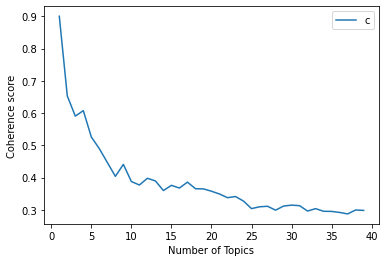

In [ ]:
x = range(start, stop, step)
plt.plot(x, coherence_value)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_value):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.9
Num Topics = 2  has Coherence Value of 0.653
Num Topics = 3  has Coherence Value of 0.5905
Num Topics = 4  has Coherence Value of 0.6074
Num Topics = 5  has Coherence Value of 0.5257
Num Topics = 6  has Coherence Value of 0.4895
Num Topics = 7  has Coherence Value of 0.4467
Num Topics = 8  has Coherence Value of 0.4037
Num Topics = 9  has Coherence Value of 0.4408
Num Topics = 10  has Coherence Value of 0.3877
Num Topics = 11  has Coherence Value of 0.3769
Num Topics = 12  has Coherence Value of 0.3978
Num Topics = 13  has Coherence Value of 0.3895
Num Topics = 14  has Coherence Value of 0.3598
Num Topics = 15  has Coherence Value of 0.3758
Num Topics = 16  has Coherence Value of 0.3675
Num Topics = 17  has Coherence Value of 0.3858
Num Topics = 18  has Coherence Value of 0.3654
Num Topics = 19  has Coherence Value of 0.3649
Num Topics = 20  has Coherence Value of 0.3577
Num Topics = 21  has Coherence Value of 0.349
Num Topics = 22  has Cohere

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
''' 
After builing 2 models, I think LSA is better because of quick and efficient to use. 
LSA algorithm is a simple method and it gives a direct output. After I built LSA model using Gensim, I immediately generate a model and get a result with different values of number of topics. I only need a few steps to optimize the result (optimum number of topics). 
To find the ptimal number of topics in LDA, I have to use Mallet's version of LDA algorithm to build many lDA models with different value of number of topics and pick the highest coherence value.
However, it's easily to visualize LDA with pyLDAVis tool which you can visualize the distance between each topic (left part of the image) and by selecting a particular topic you can see the distribution of words in the horizontal bar graph (right part of the image).

